# 1. Understanding the Data and Problem Statement

- The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.


- The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

- Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of the customer lifecycle :

  - **The ‘good’ phase:** In this phase, the customer is happy with the service and behaves as usual.

  - **The ‘action’ phase:** The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than in the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

  - **The ‘churn’ phase:** In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

- **Definitions of churn:**
  - **Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

- **Problem Statement:** In the Indian and Southeast Asian markets, approximately 80% of revenue comes from the top 20% of customers (called high-value customers). Thus, if we can reduce the churn of high-value customers, we will be able to reduce significant revenue leakage.


# 2. Exploratory Data Analysis

## 2.1. Inspecting the Dataset

In [ ]:
# Impoting the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

In [ ]:
#Loading the data

data = pd.read_csv("Customer Churn.csv")

In [ ]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [ ]:
data.shape

(99999, 226)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [ ]:
df_columns = data.columns

In [ ]:
df_columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [ ]:
categorical_var = ["circle_id"]
binary_categorical_var = ["fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]
numerical_var = ["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "arpu_6", "arpu_7", "arpu_8", "arpu_9", "onnet_mou_6", "onnet_mou_7", "onnet_mou_8", "onnet_mou_9", "offnet_mou_6", "offnet_mou_7", "offnet_mou_8", "offnet_mou_9", "roam_ic_mou_6", "roam_ic_mou_7", "roam_ic_mou_8", "roam_ic_mou_9", "roam_og_mou_7", "roam_og_mou_8", "roam_og_mou_9", "loc_og_t2t_mou_6", "loc_og_t2t_mou_7", "loc_og_t2t_mou_8", "loc_og_t2t_mou_9", "loc_og_t2m_mou_6", "loc_og_t2m_mou_7", "loc_og_t2m_mou_8", "loc_og_t2m_mou_9", "loc_og_t2f_mou_6", "loc_og_t2f_mou_7", "loc_og_t2f_mou_8", "loc_og_t2f_mou_9", "loc_og_t2c_mou_6", "loc_og_t2c_mou_7", "loc_og_t2c_mou_8", "loc_og_t2c_mou_9", "loc_og_mou_6", "loc_og_mou_7", "loc_og_mou_8", "loc_og_mou_9", "std_og_t2t_mou_6", "std_og_t2t_mou_7", "std_og_t2t_mou_8", "std_og_t2t_mou_9", "std_og_t2m_mou_6", "std_og_t2m_mou_7", "std_og_t2m_mou_8", "std_og_t2m_mou_9", "std_og_t2f_mou_6", "std_og_t2f_mou_7", "std_og_t2f_mou_8", "std_og_t2f_mou_9", "std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8", "std_og_t2c_mou_9", "std_og_mou_6", "std_og_mou_7", "std_og_mou_8", "std_og_mou_9", "isd_og_mou_6", "isd_og_mou_7", "isd_og_mou_8", "isd_og_mou_9", "spl_og_mou_6", "spl_og_mou_7", "spl_og_mou_8", "spl_og_mou_9", "og_others_6", "og_others_7", "og_others_8", "og_others_9", "total_og_mou_6", "total_og_mou_7", "total_og_mou_8", "total_og_mou_9", "loc_ic_t2t_mou_6", "loc_ic_t2t_mou_7", "loc_ic_t2t_mou_8", "loc_ic_t2t_mou_9", "loc_ic_t2m_mou_6", "loc_ic_t2m_mou_7", "loc_ic_t2m_mou_8", "loc_ic_t2m_mou_9", "loc_ic_t2f_mou_6", "loc_ic_t2f_mou_7", "loc_ic_t2f_mou_8", "loc_ic_t2f_mou_9", "loc_ic_mou_7", "loc_ic_mou_8", "loc_ic_mou_9", "std_ic_t2t_mou_6", "std_ic_t2t_mou_7", "std_ic_t2t_mou_8", "std_ic_t2t_mou_9", "std_ic_t2m_mou_6", "std_ic_t2m_mou_7", "std_ic_t2m_mou_8", "std_ic_t2m_mou_9", "std_ic_t2f_mou_6", "std_ic_t2f_mou_7", "std_ic_t2f_mou_8", "std_ic_t2f_mou_9", "std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8", "std_ic_t2o_mou_9", "std_ic_mou_6", "std_ic_mou_7", "std_ic_mou_8", "std_ic_mou_9", "total_ic_mou_6", "total_ic_mou_7", "total_ic_mou_8", "total_ic_mou_9", "spl_ic_mou_6", "spl_ic_mou_7", "spl_ic_mou_8", "spl_ic_mou_9", "isd_ic_mou_6", "isd_ic_mou_7", "isd_ic_mou_8", "isd_ic_mou_9", "ic_others_6", "ic_others_7", "ic_others_8", "ic_others_9", "total_rech_num_6", "total_rech_num_7", "total_rech_num_8", "total_rech_num_9", "total_rech_amt_7", "total_rech_amt_8", "total_rech_amt_9", "max_rech_amt_6", "max_rech_amt_7", "max_rech_amt_8", "max_rech_amt_9", "last_day_rch_amt_6", "last_day_rch_amt_7", "last_day_rch_amt_8", "last_day_rch_amt_9", "total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", "max_rech_data_6", "max_rech_data_7", "max_rech_data_8", "max_rech_data_9", "count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8", "count_rech_2g_9", "count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8", "count_rech_3g_9", "av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8", "av_rech_amt_data_9", "vol_2g_mb_6", "vol_2g_mb_7", "vol_2g_mb_8", "vol_2g_mb_9", "vol_3g_mb_6", "vol_3g_mb_7", "vol_3g_mb_8", "vol_3g_mb_9", "arpu_3g_6", "arpu_3g_7", "arpu_3g_8", "arpu_3g_9", "arpu_2g_6", "arpu_2g_7", "arpu_2g_8", "arpu_2g_9", "night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9", "monthly_2g_6", "monthly_2g_7", "monthly_2g_8", "monthly_2g_9", "sachet_2g_6", "sachet_2g_7", "sachet_2g_8", "sachet_2g_9", "monthly_3g_6", "monthly_3g_7", "monthly_3g_8", "monthly_3g_9", "sachet_3g_6", "sachet_3g_7", "sachet_3g_8", "sachet_3g_9", "aon", "aug_vbc_3g", "jul_vbc_3g", "jun_vbc_3g", "sep_vbc_3g"]
date_and_time = ["last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8", "last_date_of_month_9", "date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8", "date_of_last_rech_9", "date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8", "date_of_last_rech_data_9"]

In [ ]:
data.drop(["mobile_number"], axis = 1)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.00
99995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,77.811,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.00
99996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,0.000,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.00
99997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,303.386,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.00


## 2.2. Treating the null values

In [ ]:
data[categorical_var].isnull().sum()/99999*100

circle_id    0.0
dtype: float64

In [ ]:
data[binary_categorical_var].isnull().sum()/99999*100

fb_user_6    74.846748
fb_user_7    74.428744
fb_user_8    73.660737
fb_user_9    74.077741
dtype: float64

In [ ]:
data[date_and_time].isnull().sum()/99999*100

last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
date_of_last_rech_6          1.607016
date_of_last_rech_7          1.767018
date_of_last_rech_8          3.622036
date_of_last_rech_9          4.760048
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
dtype: float64

In [ ]:
data[["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "arpu_6", "arpu_7", "arpu_8", "arpu_9", "onnet_mou_6", "onnet_mou_7", "onnet_mou_8", "onnet_mou_9", "offnet_mou_6", "offnet_mou_7", "offnet_mou_8", "offnet_mou_9", "roam_ic_mou_6", "roam_ic_mou_7", "roam_ic_mou_8", "roam_ic_mou_9", "roam_og_mou_7", "roam_og_mou_8", "roam_og_mou_9", "loc_og_t2t_mou_6", "loc_og_t2t_mou_7", "loc_og_t2t_mou_8", "loc_og_t2t_mou_9", "loc_og_t2m_mou_6", "loc_og_t2m_mou_7", "loc_og_t2m_mou_8", "loc_og_t2m_mou_9", "loc_og_t2f_mou_6", "loc_og_t2f_mou_7", "loc_og_t2f_mou_8", "loc_og_t2f_mou_9", "loc_og_t2c_mou_6", "loc_og_t2c_mou_7", "loc_og_t2c_mou_8", "loc_og_t2c_mou_9", "loc_og_mou_6", "loc_og_mou_7", "loc_og_mou_8", "loc_og_mou_9", "std_og_t2t_mou_6", "std_og_t2t_mou_7", "std_og_t2t_mou_8", "std_og_t2t_mou_9", "std_og_t2m_mou_6", "std_og_t2m_mou_7", "std_og_t2m_mou_8", "std_og_t2m_mou_9", "std_og_t2f_mou_6", "std_og_t2f_mou_7"]].isnull().sum()/99999*100

loc_og_t2o_mou      1.018010
std_og_t2o_mou      1.018010
loc_ic_t2o_mou      1.018010
arpu_6              0.000000
arpu_7              0.000000
arpu_8              0.000000
arpu_9              0.000000
onnet_mou_6         3.937039
onnet_mou_7         3.859039
onnet_mou_8         5.378054
onnet_mou_9         7.745077
offnet_mou_6        3.937039
offnet_mou_7        3.859039
offnet_mou_8        5.378054
offnet_mou_9        7.745077
roam_ic_mou_6       3.937039
roam_ic_mou_7       3.859039
roam_ic_mou_8       5.378054
roam_ic_mou_9       7.745077
roam_og_mou_7       3.859039
roam_og_mou_8       5.378054
roam_og_mou_9       7.745077
loc_og_t2t_mou_6    3.937039
loc_og_t2t_mou_7    3.859039
loc_og_t2t_mou_8    5.378054
loc_og_t2t_mou_9    7.745077
loc_og_t2m_mou_6    3.937039
loc_og_t2m_mou_7    3.859039
loc_og_t2m_mou_8    5.378054
loc_og_t2m_mou_9    7.745077
loc_og_t2f_mou_6    3.937039
loc_og_t2f_mou_7    3.859039
loc_og_t2f_mou_8    5.378054
loc_og_t2f_mou_9    7.745077
loc_og_t2c_mou

In [ ]:
data[["std_og_t2f_mou_8", "std_og_t2f_mou_9", "std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8", "std_og_t2c_mou_9", "std_og_mou_6", "std_og_mou_7", "std_og_mou_8", "std_og_mou_9", "isd_og_mou_6", "isd_og_mou_7", "isd_og_mou_8", "isd_og_mou_9", "spl_og_mou_6", "spl_og_mou_7", "spl_og_mou_8", "spl_og_mou_9", "og_others_6", "og_others_7", "og_others_8", "og_others_9", "total_og_mou_6", "total_og_mou_7", "total_og_mou_8", "total_og_mou_9", "loc_ic_t2t_mou_6", "loc_ic_t2t_mou_7", "loc_ic_t2t_mou_8", "loc_ic_t2t_mou_9", "loc_ic_t2m_mou_6", "loc_ic_t2m_mou_7", "loc_ic_t2m_mou_8", "loc_ic_t2m_mou_9", "loc_ic_t2f_mou_6", "loc_ic_t2f_mou_7", "loc_ic_t2f_mou_8", "loc_ic_t2f_mou_9", "loc_ic_mou_7", "loc_ic_mou_8", "loc_ic_mou_9", "std_ic_t2t_mou_6", "std_ic_t2t_mou_7", "std_ic_t2t_mou_8", "std_ic_t2t_mou_9", "std_ic_t2m_mou_6", "std_ic_t2m_mou_7", "std_ic_t2m_mou_8", "std_ic_t2m_mou_9", "std_ic_t2f_mou_6", "std_ic_t2f_mou_7", "std_ic_t2f_mou_8"]].isnull().sum()/99999*100

std_og_t2f_mou_8    5.378054
std_og_t2f_mou_9    7.745077
std_og_t2c_mou_6    3.937039
std_og_t2c_mou_7    3.859039
std_og_t2c_mou_8    5.378054
std_og_t2c_mou_9    7.745077
std_og_mou_6        3.937039
std_og_mou_7        3.859039
std_og_mou_8        5.378054
std_og_mou_9        7.745077
isd_og_mou_6        3.937039
isd_og_mou_7        3.859039
isd_og_mou_8        5.378054
isd_og_mou_9        7.745077
spl_og_mou_6        3.937039
spl_og_mou_7        3.859039
spl_og_mou_8        5.378054
spl_og_mou_9        7.745077
og_others_6         3.937039
og_others_7         3.859039
og_others_8         5.378054
og_others_9         7.745077
total_og_mou_6      0.000000
total_og_mou_7      0.000000
total_og_mou_8      0.000000
total_og_mou_9      0.000000
loc_ic_t2t_mou_6    3.937039
loc_ic_t2t_mou_7    3.859039
loc_ic_t2t_mou_8    5.378054
loc_ic_t2t_mou_9    7.745077
loc_ic_t2m_mou_6    3.937039
loc_ic_t2m_mou_7    3.859039
loc_ic_t2m_mou_8    5.378054
loc_ic_t2m_mou_9    7.745077
loc_ic_t2f_mou

In [ ]:
 # Dropping the columns with more than 50% null values

null_var = ["mobile_number", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]

data.drop(null_var, axis = 1, inplace = True)

data.drop(date_and_time, axis = 1, inplace = True)

In [ ]:
# Imputing rest of the numerical data with mean

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
imputer = imputer.fit(data[numerical_var])
data[numerical_var] = imputer.transform(data[numerical_var])

## 2.3. Tagging the churns

In [ ]:
# Identifying the usage based churns

data[ (data["total_ic_mou_9"] == 0) & (data["total_og_mou_9"] == 0) & (data["vol_2g_mb_9"] == 0) & (data["vol_3g_mb_9"] == 0) ]

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109,0.0,0.0,0.0,197.385,214.816,213.803,21.1,132.395875,133.670805,...,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58
7,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.840000,54.680000,...,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.00
29,109,0.0,0.0,0.0,147.460,22.460,0.000,0.1,19.380000,14.330000,...,0.0,0.0,0.0,0.0,0.0,263.0,0.00,0.00,0.00,0.00
32,109,0.0,0.0,0.0,60.651,22.064,52.380,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,229.0,0.00,0.00,0.00,0.00
35,109,0.0,0.0,0.0,596.376,13.448,0.000,0.0,10.510000,133.670805,...,0.0,0.0,0.0,0.0,0.0,2036.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,109,0.0,0.0,0.0,30.000,31.000,2411.850,0.0,132.395875,133.670805,...,0.0,0.0,0.0,0.0,0.0,852.0,0.00,0.00,0.00,0.00
99983,109,0.0,0.0,0.0,205.227,151.684,0.000,0.0,38.260000,39.390000,...,0.0,0.0,0.0,0.0,0.0,1362.0,0.00,0.00,0.00,0.00
99993,109,0.0,0.0,0.0,8.440,0.000,80.387,0.0,132.395875,133.670805,...,0.0,0.0,0.0,0.0,0.0,492.0,0.00,0.00,0.00,0.00
99996,109,0.0,0.0,0.0,229.187,0.000,0.000,0.0,1.110000,133.670805,...,0.0,0.0,0.0,0.0,0.0,185.0,0.00,0.00,0.00,0.00


In [ ]:
# Tagging the usage based churns

data[ (data["total_ic_mou_9"] == 0) & (data["total_og_mou_9"] == 0) & (data["vol_2g_mb_9"] == 0) & (data["vol_3g_mb_9"] == 0) ]

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109,0.0,0.0,0.0,197.385,214.816,213.803,21.1,132.395875,133.670805,...,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58
7,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.840000,54.680000,...,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.00
29,109,0.0,0.0,0.0,147.460,22.460,0.000,0.1,19.380000,14.330000,...,0.0,0.0,0.0,0.0,0.0,263.0,0.00,0.00,0.00,0.00
32,109,0.0,0.0,0.0,60.651,22.064,52.380,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,229.0,0.00,0.00,0.00,0.00
35,109,0.0,0.0,0.0,596.376,13.448,0.000,0.0,10.510000,133.670805,...,0.0,0.0,0.0,0.0,0.0,2036.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,109,0.0,0.0,0.0,30.000,31.000,2411.850,0.0,132.395875,133.670805,...,0.0,0.0,0.0,0.0,0.0,852.0,0.00,0.00,0.00,0.00
99983,109,0.0,0.0,0.0,205.227,151.684,0.000,0.0,38.260000,39.390000,...,0.0,0.0,0.0,0.0,0.0,1362.0,0.00,0.00,0.00,0.00
99993,109,0.0,0.0,0.0,8.440,0.000,80.387,0.0,132.395875,133.670805,...,0.0,0.0,0.0,0.0,0.0,492.0,0.00,0.00,0.00,0.00
99996,109,0.0,0.0,0.0,229.187,0.000,0.000,0.0,1.110000,133.670805,...,0.0,0.0,0.0,0.0,0.0,185.0,0.00,0.00,0.00,0.00


In [ ]:
data["churn_tag"] = data["total_ic_mou_9"]  + data["total_og_mou_9"] + data["vol_2g_mb_9"] + data["vol_3g_mb_9"]

data["churn_tag"].head()

0      0.00
1    260.15
2    651.10
3    667.92
4    309.90
Name: churn_tag, dtype: float64

In [ ]:
data["churn"] = data["churn_tag"].apply(lambda x: 1 if x == 0 else 0)

In [ ]:
data = data.drop(["churn_tag"], axis = 1)

## 2.4. Filtering the High-Value Customer

In [ ]:
data["RECH_Good_Phase"] = (data["total_rech_amt_6"] + data["total_rech_amt_7"])/2

In [ ]:
data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,RECH_Good_Phase
0,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,132.395875,133.670805,...,0.0,0.0,0.0,968.0,30.4,0.0,101.20,3.58,1,307.0
1,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.110000,78.680000,...,0.0,0.0,0.0,1006.0,0.0,0.0,0.00,0.00,0,229.0
2,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.540000,55.240000,...,0.0,0.0,0.0,1103.0,0.0,0.0,4.17,0.00,0,241.5
3,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.910000,54.390000,...,0.0,0.0,0.0,2491.0,0.0,0.0,0.00,0.00,0,270.0
4,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.310000,149.440000,...,0.0,0.0,0.0,1526.0,0.0,0.0,0.00,0.00,0,273.0


In [ ]:
data["RECH_Good_Phase"].describe()

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
25%        115.000000
50%        229.000000
75%        419.000000
max      37762.500000
Name: RECH_Good_Phase, dtype: float64

In [ ]:
data["high_value_customer"] = data["RECH_Good_Phase"].apply(lambda x: 1 if x >= (325.269677*0.70) else 0)

In [ ]:
data[["high_value_customer", "RECH_Good_Phase"]]

,high_value_customer,RECH_Good_Phase
0,1,307.0
1,1,229.0
2,1,241.5
3,1,270.0
4,1,273.0
...,...,...
99994,0,85.0
99995,0,110.0
99996,0,59.5
99997,1,369.5


In [ ]:
data1 = data[ (data["high_value_customer"] == 1) ]

In [ ]:
data1.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,RECH_Good_Phase,high_value_customer
0,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,132.395875,133.670805,...,0.0,0.0,968.0,30.4,0.0,101.20,3.58,1,307.0,1
1,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.110000,78.680000,...,0.0,0.0,1006.0,0.0,0.0,0.00,0.00,0,229.0,1
2,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.540000,55.240000,...,0.0,0.0,1103.0,0.0,0.0,4.17,0.00,0,241.5,1
3,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.910000,54.390000,...,0.0,0.0,2491.0,0.0,0.0,0.00,0.00,0,270.0,1
4,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.310000,149.440000,...,0.0,0.0,1526.0,0.0,0.0,0.00,0.00,0,273.0,1


In [ ]:
data1 = data1.dropna()

## 2.5. Univariate Analysis

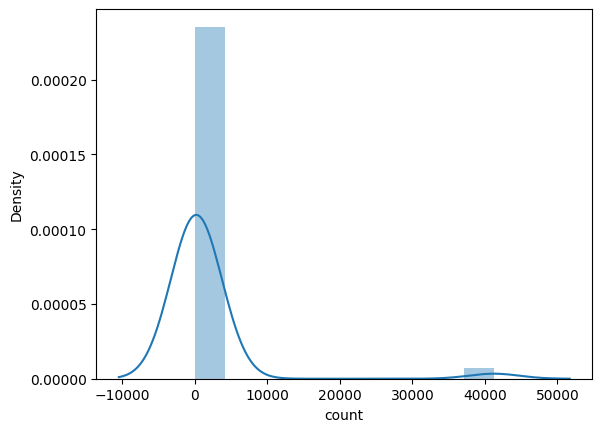

In [ ]:
sns.distplot(data1["sachet_2g_7"].value_counts(), bins = 10)
plt.show()

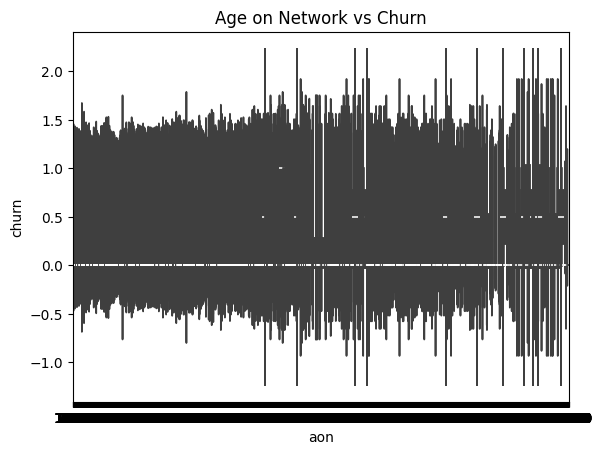

In [ ]:
sns.violinplot(x='aon', y='churn', data=data1)
plt.title('Age on Network vs Churn')
plt.show()

## 2.6. Bivariate Analysis

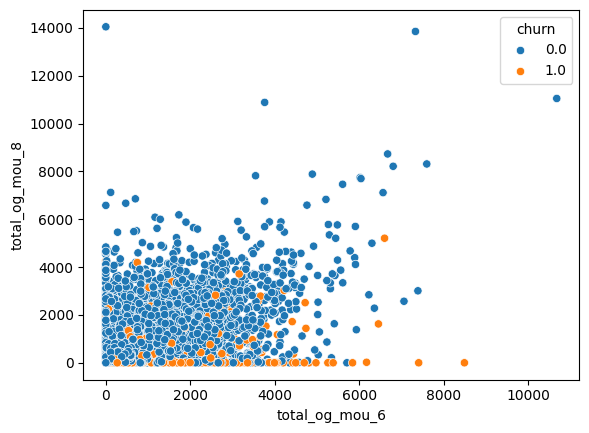

In [ ]:
sns.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_8'],hue=data1['churn'])
plt.show()

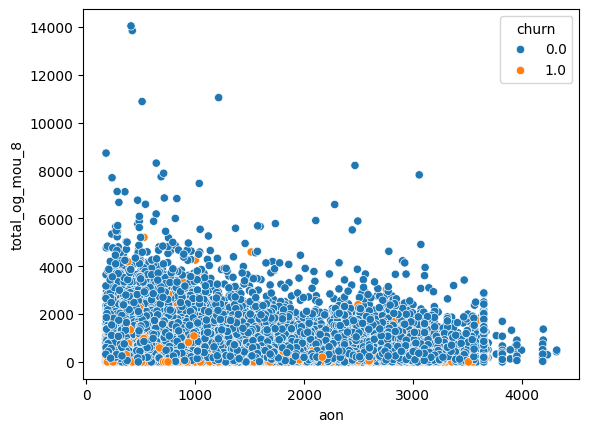

In [ ]:
sns.scatterplot(x=data['aon'],y=data['total_og_mou_8'],hue=data1['churn'])
plt.show()

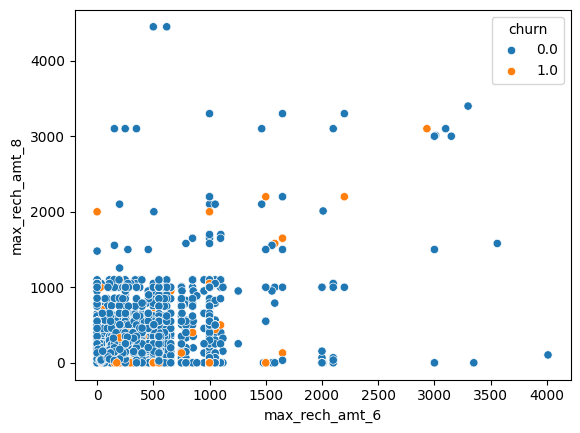

In [ ]:
sns.scatterplot(x=data['max_rech_amt_6'],y=data['max_rech_amt_8'],hue=data1['churn'])
plt.show()

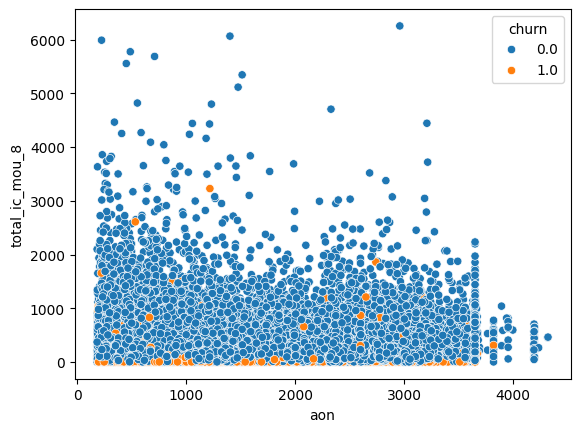

In [ ]:
sns.scatterplot(x=data['aon'],y=data['total_ic_mou_8'],hue=data1['churn'])
plt.show()

# 3. Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data1, random_state=42)
df_train.shape, df_test.shape

((37128, 212), (12376, 212))

In [ ]:
x_train = df_train.drop("churn", axis = 1)
x_test = df_test.drop("churn", axis = 1)

y_train = df_train["churn"]
y_test = df_test["churn"]

# 4. Feature Engineering

## 4.1. Fixing Class Imbalance

In [ ]:
data1["churn"].value_counts(normalize = True)

churn
0    0.915482
1    0.084518
Name: proportion, dtype: float64

In [ ]:
data1["churn"].value_counts(normalize = True)

churn
0    0.915482
1    0.084518
Name: proportion, dtype: float64

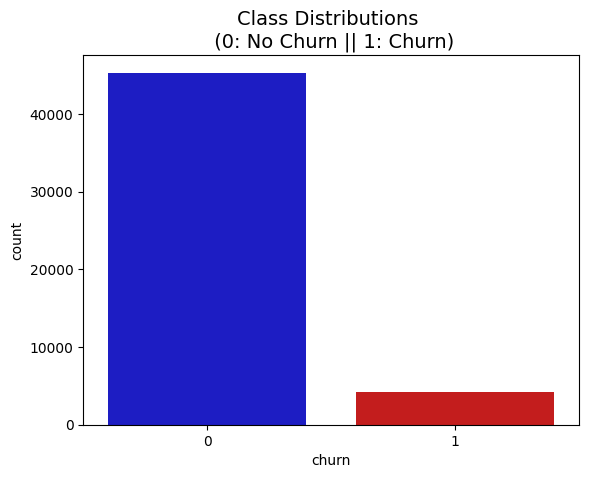

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(data = data1, x = "churn", palette=colors)
plt.title('Class Distributions \n (0: No Churn || 1: Churn)', fontsize=14)
plt.show()

In [ ]:
data1["churn"].value_counts(normalize = True)

churn
0    0.915482
1    0.084518
Name: proportion, dtype: float64

In [ ]:
data1["churn"].value_counts(normalize = True)

churn
0    0.915482
1    0.084518
Name: proportion, dtype: float64

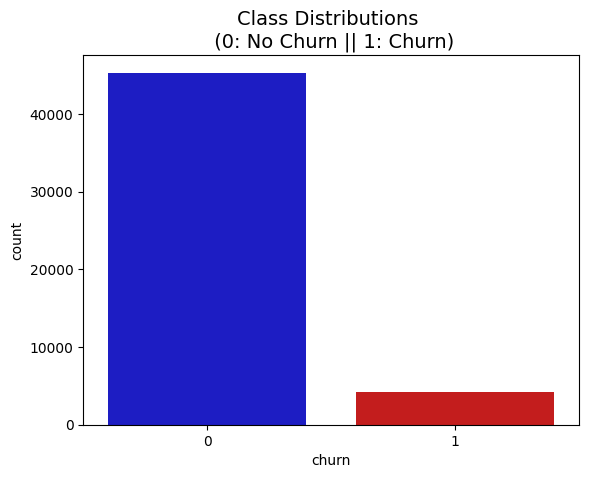

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(data = data1, x = "churn", palette=colors)
plt.title('Class Distributions \n (0: No Churn || 1: Churn)', fontsize=14)
plt.show()

In [ ]:
%%time
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
x_resampled_us, y_resampled_us = under_sample.fit_resample(x_train, y_train)
len(x_resampled_us)

CPU times: user 96.6 ms, sys: 13.4 ms, total: 110 ms
Wall time: 119 ms


6272

In [ ]:
print(sorted(Counter(y_resampled_us).items()))

[(0, 3136), (1, 3136)]


In [ ]:
print(x_train.shape, y_train.shape)

print(x_resampled_us.shape, y_resampled_us.shape)

(37128, 211) (37128,)
(6272, 211) (6272,)


In [ ]:
x_train = x_resampled_us
y_train = y_resampled_us

## 4.1. Feature Scalling

In [ ]:
df_train.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,RECH_Good_Phase,high_value_customer
count,37128.0,37128.0,37128.0,37128.0,37128.000000,37128.000000,37128.000000,37128.000000,37128.000000,37128.000000,...,37128.000000,37128.000000,37128.000000,37128.000000,37128.000000,37128.000000,37128.000000,37128.000000,37128.000000,37128.0
mean,109.0,0.0,0.0,0.0,457.886158,450.620916,418.332157,387.823248,221.303126,224.620907,...,0.116704,0.115465,1261.016726,104.638394,107.948294,96.760892,4.990226,0.084465,535.201088,1.0
std,0.0,0.0,0.0,0.0,377.053771,370.066000,401.970567,385.904362,384.311548,398.580341,...,0.821200,0.777335,972.271992,340.422775,356.488222,337.345696,40.295082,0.278087,405.900476,0.0
min,109.0,0.0,0.0,0.0,-2041.228000,-1289.715000,-945.808000,-1474.195000,0.000000,0.000000,...,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,228.000000,1.0
25%,109.0,0.0,0.0,0.0,251.269250,245.700250,200.968000,168.329250,26.410000,25.690000,...,0.000000,0.000000,478.000000,0.000000,0.000000,0.000000,0.000000,0.000000,305.000000,1.0
50%,109.0,0.0,0.0,0.0,367.165000,361.113000,335.319500,309.264000,85.650000,84.860000,...,0.000000,0.000000,909.000000,0.000000,0.000000,0.000000,0.000000,0.000000,419.000000,1.0
75%,109.0,0.0,0.0,0.0,555.705750,551.230250,535.711500,508.924000,242.600000,241.605000,...,0.000000,0.000000,1931.250000,0.000000,0.000000,0.000000,0.000000,0.000000,626.000000,1.0
max,109.0,0.0,0.0,0.0,15487.684000,16820.145000,19295.904000,15459.993000,7011.110000,8157.780000,...,38.000000,36.000000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,1.000000,18750.000000,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "arpu_6", "arpu_7", "arpu_8", "arpu_9", "onnet_mou_6", "onnet_mou_7", "onnet_mou_8", "onnet_mou_9", "offnet_mou_6", "offnet_mou_7", "offnet_mou_8", "offnet_mou_9", "roam_ic_mou_6", "roam_ic_mou_7", "roam_ic_mou_8", "roam_ic_mou_9", "roam_og_mou_7", "roam_og_mou_8", "roam_og_mou_9", "loc_og_t2t_mou_6", "loc_og_t2t_mou_7", "loc_og_t2t_mou_8", "loc_og_t2t_mou_9", "loc_og_t2m_mou_6", "loc_og_t2m_mou_7", "loc_og_t2m_mou_8", "loc_og_t2m_mou_9", "loc_og_t2f_mou_6", "loc_og_t2f_mou_7", "loc_og_t2f_mou_8", "loc_og_t2f_mou_9", "loc_og_t2c_mou_6", "loc_og_t2c_mou_7", "loc_og_t2c_mou_8", "loc_og_t2c_mou_9", "loc_og_mou_6", "loc_og_mou_7", "loc_og_mou_8", "loc_og_mou_9", "std_og_t2t_mou_6", "std_og_t2t_mou_7", "std_og_t2t_mou_8", "std_og_t2t_mou_9", "std_og_t2m_mou_6", "std_og_t2m_mou_7", "std_og_t2m_mou_8", "std_og_t2m_mou_9", "std_og_t2f_mou_6", "std_og_t2f_mou_7", "std_og_t2f_mou_8", "std_og_t2f_mou_9", "std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8", "std_og_t2c_mou_9", "std_og_mou_6", "std_og_mou_7", "std_og_mou_8", "std_og_mou_9", "isd_og_mou_6", "isd_og_mou_7", "isd_og_mou_8", "isd_og_mou_9", "spl_og_mou_6", "spl_og_mou_7", "spl_og_mou_8", "spl_og_mou_9", "og_others_6", "og_others_7", "og_others_8", "og_others_9", "total_og_mou_6", "total_og_mou_7", "total_og_mou_8", "total_og_mou_9", "loc_ic_t2t_mou_6", "loc_ic_t2t_mou_7", "loc_ic_t2t_mou_8", "loc_ic_t2t_mou_9", "loc_ic_t2m_mou_6", "loc_ic_t2m_mou_7", "loc_ic_t2m_mou_8", "loc_ic_t2m_mou_9", "loc_ic_t2f_mou_6", "loc_ic_t2f_mou_7", "loc_ic_t2f_mou_8", "loc_ic_t2f_mou_9", "loc_ic_mou_7", "loc_ic_mou_8", "loc_ic_mou_9", "std_ic_t2t_mou_6", "std_ic_t2t_mou_7", "std_ic_t2t_mou_8", "std_ic_t2t_mou_9", "std_ic_t2m_mou_6", "std_ic_t2m_mou_7", "std_ic_t2m_mou_8", "std_ic_t2m_mou_9", "std_ic_t2f_mou_6", "std_ic_t2f_mou_7", "std_ic_t2f_mou_8", "std_ic_t2f_mou_9", "std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8", "std_ic_t2o_mou_9", "std_ic_mou_6", "std_ic_mou_7", "std_ic_mou_8", "std_ic_mou_9", "total_ic_mou_6", "total_ic_mou_7", "total_ic_mou_8", "total_ic_mou_9", "spl_ic_mou_6", "spl_ic_mou_7", "spl_ic_mou_8", "spl_ic_mou_9", "isd_ic_mou_6", "isd_ic_mou_7", "isd_ic_mou_8", "isd_ic_mou_9", "ic_others_6", "ic_others_7", "ic_others_8", "ic_others_9", "total_rech_num_6", "total_rech_num_7", "total_rech_num_8", "total_rech_num_9", "total_rech_amt_7", "total_rech_amt_8", "total_rech_amt_9", "max_rech_amt_6", "max_rech_amt_7", "max_rech_amt_8", "max_rech_amt_9", "last_day_rch_amt_6", "last_day_rch_amt_7", "last_day_rch_amt_8", "last_day_rch_amt_9", "total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", "max_rech_data_6", "max_rech_data_7", "max_rech_data_8", "max_rech_data_9", "count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8", "count_rech_2g_9", "count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8", "count_rech_3g_9", "av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8", "av_rech_amt_data_9", "vol_2g_mb_6", "vol_2g_mb_7", "vol_2g_mb_8", "vol_2g_mb_9", "vol_3g_mb_6", "vol_3g_mb_7", "vol_3g_mb_8", "vol_3g_mb_9", "arpu_3g_6", "arpu_3g_7", "arpu_3g_8", "arpu_3g_9", "arpu_2g_6", "arpu_2g_7", "arpu_2g_8", "arpu_2g_9", "night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9", "monthly_2g_6", "monthly_2g_7", "monthly_2g_8", "monthly_2g_9", "sachet_2g_6", "sachet_2g_7", "sachet_2g_8", "sachet_2g_9", "monthly_3g_6", "monthly_3g_7", "monthly_3g_8", "monthly_3g_9", "sachet_3g_6", "sachet_3g_7", "sachet_3g_8", "sachet_3g_9", "aon", "aug_vbc_3g", "jul_vbc_3g", "jun_vbc_3g", "sep_vbc_3g"]] = scaler.fit_transform(df_train[["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "arpu_6", "arpu_7", "arpu_8", "arpu_9", "onnet_mou_6", "onnet_mou_7", "onnet_mou_8", "onnet_mou_9", "offnet_mou_6", "offnet_mou_7", "offnet_mou_8", "offnet_mou_9", "roam_ic_mou_6", "roam_ic_mou_7", "roam_ic_mou_8", "roam_ic_mou_9", "roam_og_mou_7", "roam_og_mou_8", "roam_og_mou_9", "loc_og_t2t_mou_6", "loc_og_t2t_mou_7", "loc_og_t2t_mou_8", "loc_og_t2t_mou_9", "loc_og_t2m_mou_6", "loc_og_t2m_mou_7", "loc_og_t2m_mou_8", "loc_og_t2m_mou_9", "loc_og_t2f_mou_6", "loc_og_t2f_mou_7", "loc_og_t2f_mou_8", "loc_og_t2f_mou_9", "loc_og_t2c_mou_6", "loc_og_t2c_mou_7", "loc_og_t2c_mou_8", "loc_og_t2c_mou_9", "loc_og_mou_6", "loc_og_mou_7", "loc_og_mou_8", "loc_og_mou_9", "std_og_t2t_mou_6", "std_og_t2t_mou_7", "std_og_t2t_mou_8", "std_og_t2t_mou_9", "std_og_t2m_mou_6", "std_og_t2m_mou_7", "std_og_t2m_mou_8", "std_og_t2m_mou_9", "std_og_t2f_mou_6", "std_og_t2f_mou_7", "std_og_t2f_mou_8", "std_og_t2f_mou_9", "std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8", "std_og_t2c_mou_9", "std_og_mou_6", "std_og_mou_7", "std_og_mou_8", "std_og_mou_9", "isd_og_mou_6", "isd_og_mou_7", "isd_og_mou_8", "isd_og_mou_9", "spl_og_mou_6", "spl_og_mou_7", "spl_og_mou_8", "spl_og_mou_9", "og_others_6", "og_others_7", "og_others_8", "og_others_9", "total_og_mou_6", "total_og_mou_7", "total_og_mou_8", "total_og_mou_9", "loc_ic_t2t_mou_6", "loc_ic_t2t_mou_7", "loc_ic_t2t_mou_8", "loc_ic_t2t_mou_9", "loc_ic_t2m_mou_6", "loc_ic_t2m_mou_7", "loc_ic_t2m_mou_8", "loc_ic_t2m_mou_9", "loc_ic_t2f_mou_6", "loc_ic_t2f_mou_7", "loc_ic_t2f_mou_8", "loc_ic_t2f_mou_9", "loc_ic_mou_7", "loc_ic_mou_8", "loc_ic_mou_9", "std_ic_t2t_mou_6", "std_ic_t2t_mou_7", "std_ic_t2t_mou_8", "std_ic_t2t_mou_9", "std_ic_t2m_mou_6", "std_ic_t2m_mou_7", "std_ic_t2m_mou_8", "std_ic_t2m_mou_9", "std_ic_t2f_mou_6", "std_ic_t2f_mou_7", "std_ic_t2f_mou_8", "std_ic_t2f_mou_9", "std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8", "std_ic_t2o_mou_9", "std_ic_mou_6", "std_ic_mou_7", "std_ic_mou_8", "std_ic_mou_9", "total_ic_mou_6", "total_ic_mou_7", "total_ic_mou_8", "total_ic_mou_9", "spl_ic_mou_6", "spl_ic_mou_7", "spl_ic_mou_8", "spl_ic_mou_9", "isd_ic_mou_6", "isd_ic_mou_7", "isd_ic_mou_8", "isd_ic_mou_9", "ic_others_6", "ic_others_7", "ic_others_8", "ic_others_9", "total_rech_num_6", "total_rech_num_7", "total_rech_num_8", "total_rech_num_9", "total_rech_amt_7", "total_rech_amt_8", "total_rech_amt_9", "max_rech_amt_6", "max_rech_amt_7", "max_rech_amt_8", "max_rech_amt_9", "last_day_rch_amt_6", "last_day_rch_amt_7", "last_day_rch_amt_8", "last_day_rch_amt_9", "total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", "max_rech_data_6", "max_rech_data_7", "max_rech_data_8", "max_rech_data_9", "count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8", "count_rech_2g_9", "count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8", "count_rech_3g_9", "av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8", "av_rech_amt_data_9", "vol_2g_mb_6", "vol_2g_mb_7", "vol_2g_mb_8", "vol_2g_mb_9", "vol_3g_mb_6", "vol_3g_mb_7", "vol_3g_mb_8", "vol_3g_mb_9", "arpu_3g_6", "arpu_3g_7", "arpu_3g_8", "arpu_3g_9", "arpu_2g_6", "arpu_2g_7", "arpu_2g_8", "arpu_2g_9", "night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9", "monthly_2g_6", "monthly_2g_7", "monthly_2g_8", "monthly_2g_9", "sachet_2g_6", "sachet_2g_7", "sachet_2g_8", "sachet_2g_9", "monthly_3g_6", "monthly_3g_7", "monthly_3g_8", "monthly_3g_9", "sachet_3g_6", "sachet_3g_7", "sachet_3g_8", "sachet_3g_9", "aon", "aug_vbc_3g", "jul_vbc_3g", "jun_vbc_3g", "sep_vbc_3g"]])

In [ ]:
df_train[numerical_var].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,37128.0,37128.0,37128.0,37128.000000,37128.000000,37128.000000,37128.000000,37128.000000,37128.000000,37128.000000,...,37128.000000,37128.000000,37128.000000,37128.000000,37128.000000,37128.000000,37128.000000,37128.000000,37128.000000,37128.000000
mean,0.0,0.0,0.0,0.142571,0.096099,0.067393,0.109956,0.031565,0.027535,0.019060,...,0.012049,0.003939,0.003746,0.003071,0.003207,0.261052,0.008101,0.011778,0.008666,0.001906
std,0.0,0.0,0.0,0.021510,0.020435,0.019859,0.022788,0.054815,0.048859,0.036133,...,0.044231,0.026003,0.024650,0.021611,0.021593,0.234792,0.026356,0.038894,0.030211,0.015388
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.130784,0.084783,0.056654,0.096995,0.003767,0.003149,0.001919,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.071963,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.137395,0.091156,0.063291,0.105317,0.012216,0.010402,0.007062,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.176044,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.148151,0.101654,0.073191,0.117107,0.034602,0.029617,0.019418,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.422905,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 5. Building Model with Logistic Regression - To Identify Inportant Features Contributing to Customer Churn

In [ ]:
x_train_sm.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,RECH_Good_Phase,high_value_customer
0,109,0.0,0.0,0.0,0.000,549.199,577.936,731.656,0.00,243.38,...,0.0,0.0,0.0,508.0,0.00,0.00,0.0,0.00,318.5,1
1,109,0.0,0.0,0.0,90.291,234.458,116.816,121.116,53.63,170.66,...,0.0,0.0,0.0,2425.0,0.00,0.00,0.0,0.00,261.0,1
2,109,0.0,0.0,0.0,333.494,344.684,1008.632,821.515,335.18,635.41,...,0.0,0.0,0.0,459.0,0.00,0.00,0.0,0.00,393.0,1
3,109,0.0,0.0,0.0,886.660,1300.191,228.503,0.000,2326.49,2802.59,...,0.0,0.0,0.0,217.0,833.24,485.13,0.0,0.00,1310.0,1
4,109,0.0,0.0,0.0,433.707,592.648,380.264,396.760,12.33,29.13,...,0.0,0.0,0.0,749.0,7.37,8.92,0.0,18.26,553.0,1


In [ ]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [ ]:
import statsmodels.api as sm

In [ ]:
# First Logistic Regression Model

x_train_sm = sm.add_constant(x_train)

logml = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())

print(logml.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 6272
Model:                            GLM   Df Residuals:                     6082
Model Family:                Binomial   Df Model:                          189
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 07 Apr 2024   Deviance:                       6999.9
Time:                        10:59:53   Pearson chi2:                 3.42e+17
No. Iterations:                    18   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
circle_id            1.384e+12   5

## 5.1. Feature Selection

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 50)   # Running RFE with 50 variables as output
rfe = rfe.fit(x_train, y_train)

In [ ]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('circle_id', False, 129),
 ('loc_og_t2o_mou', False, 159),
 ('std_og_t2o_mou', False, 158),
 ('loc_ic_t2o_mou', False, 157),
 ('arpu_6', False, 86),
 ('arpu_7', False, 103),
 ('arpu_8', False, 105),
 ('arpu_9', False, 81),
 ('onnet_mou_6', False, 119),
 ('onnet_mou_7', False, 143),
 ('onnet_mou_8', True, 1),
 ('onnet_mou_9', True, 1),
 ('offnet_mou_6', False, 134),
 ('offnet_mou_7', False, 13),
 ('offnet_mou_8', False, 34),
 ('offnet_mou_9', True, 1),
 ('roam_ic_mou_6', False, 26),
 ('roam_ic_mou_7', False, 25),
 ('roam_ic_mou_8', False, 2),
 ('roam_ic_mou_9', False, 23),
 ('roam_og_mou_6', True, 1),
 ('roam_og_mou_7', False, 60),
 ('roam_og_mou_8', True, 1),
 ('roam_og_mou_9', False, 85),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_7', False, 62),
 ('loc_og_t2t_mou_8', False, 75),
 ('loc_og_t2t_mou_9', True, 1),
 ('loc_og_t2m_mou_6', False, 36),
 ('loc_og_t2m_mou_7', False, 11),
 ('loc_og_t2m_mou_8', False, 133),
 ('loc_og_t2m_mou_9', True, 1),
 ('loc_og_t2f_mou_6', False, 14)

In [ ]:
col = x_train.columns[rfe.support_]

In [ ]:
# Columns that has been included

x_train.columns[rfe.support_]

Index(['onnet_mou_8', 'onnet_mou_9', 'offnet_mou_9', 'roam_og_mou_6',
       'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_mou_9', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_8',
       'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_9', 'total_og_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_9', 'std_ic_t2t_mou_8',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_8',
       'std_ic_t2f_mou_9', 'std_ic_mou_6', 'std_ic_mou_9', 'total_ic_mou_6',
       'total_ic_mou_8', 'total_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_9', 'total_rech_data_7', 'count_rech_2g_7',
       'count_rech_2g_8', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9',
       'sachet_2g_7', 'sep_vbc_3g'],
    

In [ ]:
# Columns that has not been included

x_train.columns[ ~ rfe.support_]

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'RECH_Good_Phase',
       'high_value_customer'],
      dtype='object', length=161)

## 5.2. Assessing the new model

In [ ]:
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 6272
Model:                            GLM   Df Residuals:                     6221
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 07 Apr 2024   Deviance:                       13816.
Time:                        11:00:28   Pearson chi2:                 6.76e+17
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.562e+14   3.24

In [ ]:
# Check for the VIF values of teh feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
32,std_ic_mou_9,6.375532e+08
28,std_ic_t2m_mou_9,3.564818e+08
27,std_ic_t2t_mou_9,1.563226e+08
33,total_ic_mou_6,7.488084e+06
30,std_ic_t2f_mou_9,5.954514e+06
24,loc_ic_mou_6,5.078060e+06
31,std_ic_mou_6,9.071915e+05
36,isd_ic_mou_6,1.551066e+05
39,ic_others_6,4.451010e+03
11,loc_og_mou_9,1.228760e+03


In [ ]:
high_vif = vif[ (vif["VIF"] >= 5) ].Features

In [ ]:
col = col.drop(high_vif)

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,arpu_3g_9,2.69
20,count_rech_2g_8,2.54
9,isd_og_mou_7,2.03
16,isd_ic_mou_7,1.72
22,vol_3g_mb_9,1.71
17,isd_ic_mou_8,1.68
18,last_day_rch_amt_7,1.56
4,loc_og_t2c_mou_6,1.51
10,isd_og_mou_8,1.50
8,isd_og_mou_6,1.49


## 5.3. Final Logistic Regression Model

In [ ]:
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 6272
Model:                            GLM   Df Residuals:                     6245
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 07 Apr 2024   Deviance:                       5429.9
Time:                        11:03:12   Pearson chi2:                 7.25e+07
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7956      0

In [ ]:
# Getting the predicted values on the train set

y_train_pred = res.predict(x_train_sm)

In [ ]:
y_train_pred[:10]

0    0.474397
1    0.109326
2    0.112183
3    0.737451
4    0.315863
5    0.436407
6    0.600507
7    0.389879
8    0.193786
9    0.340660
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47439668, 0.10932623, 0.11218257, 0.73745138, 0.31586285,
       0.43640729, 0.60050711, 0.38987852, 0.19378576, 0.34066014])

### 5.3.1. Creating a dataframe with the actual churn flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({"Churn": y_train.values, "Churn_Prob": y_train_pred})
y_train_pred_final["CustID"] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.474397,0
1,0,0.109326,1
2,0,0.112183,2
3,0,0.737451,3
4,0,0.315863,4


### 5.3.2. Creating a new column 'Predicted' with 1 if churn_prob > 0.5 else 0

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [ ]:
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.474397,0,0
1,0,0.109326,1,0
2,0,0.112183,2,0
3,0,0.737451,3,1
4,0,0.315863,4,0


## 5.4. Confusion Matrix and Accuracy

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[2158  978]
 [ 145 2991]]


In [ ]:
# Overall Accuracy

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8209502551020408


In [ ]:
def logistic_reg_metrics(confusion):    #confusion - numpy array
  TP = confusion[1, 1]    # True Positive
  TN = confusion[0, 0]    # True Negative
  FP = confusion[0, 1]    # False Positive
  FN = confusion[1, 0]    # False Negative

  Accuracy = float(TP + TN)/float(TP + TN +FP +FN)
  Sensitivity = (TP/float(TP + FN))
  Specificity = (TN/float(TN + FP))

  FalsePositiveRate = (FP/float(TN + FP))
  FalseNegativeRate = FN/float(FN + TP)

  Precision = TP / float(TP+FP)
  Recall = TP / float(TP+ FN)
  F1Score = 2 * ((TP / float(TP+FP)) * (TP / float(TP+ FN)))/((TP / float(TP+FP)) + (TP / float(TP+ FN)))
  print("="*100)
  print("Accuracy = {0}".format(float(TP + TN)/float(TP + TN +FP +FN)))   # Checking Accuracy
  print("Sensitivity = {0}".format((TP/float(TP + FN))))    # Checking Sensitivity
  print("Specificity = {0}\n".format((TN/float(TN + FP))))    # Checking Specificity
  print("-"*100)

  print("False Positive Rate = {0}".format((FP/float(TN + FP))))    # False Positive Rate - Predicting churn when customer does not have churned
  print("False Negative Rate = {0}".format(FN/float(FN + TP)))    # False Negative Rate
  print("Positive Predictive Value (Precision (PRE)) = {0}".format(TP / float(TP+FP)))    # Positive Predictive Value
  print("Negative Predictive Value (recall (REC)) = {0}".format(TP / float(TP+ FN)))    # Negative Predictive Value
  print("F1-Score = {0}".format(2 * ((TP / float(TP+FP)) * (TP / float(TP+ FN)))/((TP / float(TP+FP)) + (TP / float(TP+ FN)))))   # F1-Score
  print("="*100)

In [ ]:
print(logistic_reg_metrics(confusion))

Accuracy = 0.8209502551020408
Sensitivity = 0.9537627551020408
Specificity = 0.6881377551020408

----------------------------------------------------------------------------------------------------
False Positive Rate = 0.31186224489795916
False Negative Rate = 0.04623724489795918
Positive Predictive Value (Precision (PRE)) = 0.7535903250188964
Negative Predictive Value (recall (REC)) = 0.9537627551020408
F1-Score = 0.8419422941590429
None


### 5.5. Plotting ROC Curve

In [ ]:
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.474397,0,0
1,0,0.109326,1,0
2,0,0.112183,2,0
3,0,0.737451,3,1
4,0,0.315863,4,0


In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

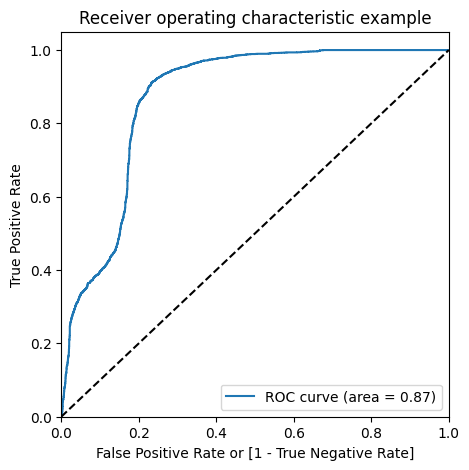

In [ ]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

## 5.6.Finding Optimal Cutoff Point

In [ ]:
# Creating Columns with Different Probability Cutoff

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
  y_train_pred_final[i] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.474397,0,0,1,1,1,1,1,0,0,0,0,0
1,0,0.109326,1,0,1,1,0,0,0,0,0,0,0,0
2,0,0.112183,2,0,1,1,0,0,0,0,0,0,0,0
3,0,0.737451,3,1,1,1,1,1,1,1,1,1,0,0
4,0,0.315863,4,0,1,1,1,1,0,0,0,0,0,0


In [ ]:
# Calculate accuracy, sensitivity and specificity for various probability cut-offs

cutoff_df = pd.DataFrame(columns = ["prob", "accuracy", "sensi", "speci"])

from sklearn.metrics import confusion_matrix

num = [0.0, 0.1, 0.3, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
  cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i])
  total1 = sum(sum(cm1))
  accuracy = (cm1[0,0]+cm1[1,1])/total1

  speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.656409  1.000000  0.312819
0.1   0.1  0.737085  0.989796  0.484375
0.3   0.3  0.784758  0.977997  0.591518
0.4   0.4  0.803890  0.969707  0.638074
0.5   0.5  0.820950  0.953763  0.688138
0.6   0.6  0.837372  0.916454  0.758291
0.7   0.7  0.683195  0.520408  0.845982
0.8   0.8  0.634407  0.306760  0.962054
0.9   0.9  0.527583  0.061862  0.993304


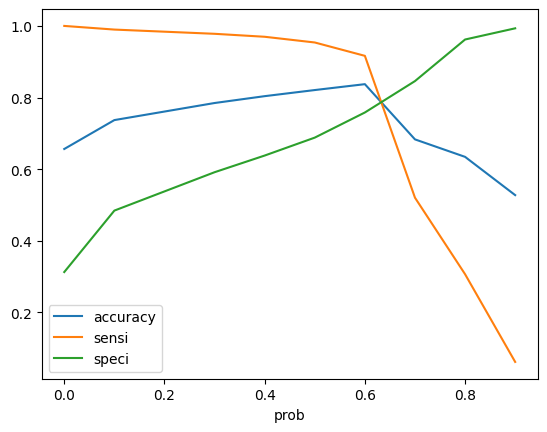

In [ ]:
# Plot the accuracy, sensitivity and specificity for various probability probabilities

cutoff_df.plot.line(x = "prob", y = ["accuracy", "sensi", "speci"])
plt.show()

In [ ]:
# From the above plot 0.15 is the optimum cut-off point

y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.15 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.474397,0,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.109326,1,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.112183,2,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.737451,3,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.315863,4,0,1,1,1,1,0,0,0,0,0,0,1


In [ ]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7573341836734694

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[1655, 1481],
       [  41, 3095]])

In [ ]:
logistic_reg_metrics(confusion2)

Accuracy = 0.7573341836734694
Sensitivity = 0.9869260204081632
Specificity = 0.5277423469387755

----------------------------------------------------------------------------------------------------
False Positive Rate = 0.47225765306122447
False Negative Rate = 0.013073979591836735
Positive Predictive Value (Precision (PRE)) = 0.6763548951048951
Negative Predictive Value (recall (REC)) = 0.9869260204081632
F1-Score = 0.8026452282157677


## 5.7. Making Prediction

### 5.7.1. Preparing the test set data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_test[["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "arpu_6", "arpu_7", "arpu_8", "arpu_9", "onnet_mou_6", "onnet_mou_7", "onnet_mou_8", "onnet_mou_9", "offnet_mou_6", "offnet_mou_7", "offnet_mou_8", "offnet_mou_9", "roam_ic_mou_6", "roam_ic_mou_7", "roam_ic_mou_8", "roam_ic_mou_9", "roam_og_mou_7", "roam_og_mou_8", "roam_og_mou_9", "loc_og_t2t_mou_6", "loc_og_t2t_mou_7", "loc_og_t2t_mou_8", "loc_og_t2t_mou_9", "loc_og_t2m_mou_6", "loc_og_t2m_mou_7", "loc_og_t2m_mou_8", "loc_og_t2m_mou_9", "loc_og_t2f_mou_6", "loc_og_t2f_mou_7", "loc_og_t2f_mou_8", "loc_og_t2f_mou_9", "loc_og_t2c_mou_6", "loc_og_t2c_mou_7", "loc_og_t2c_mou_8", "loc_og_t2c_mou_9", "loc_og_mou_6", "loc_og_mou_7", "loc_og_mou_8", "loc_og_mou_9", "std_og_t2t_mou_6", "std_og_t2t_mou_7", "std_og_t2t_mou_8", "std_og_t2t_mou_9", "std_og_t2m_mou_6", "std_og_t2m_mou_7", "std_og_t2m_mou_8", "std_og_t2m_mou_9", "std_og_t2f_mou_6", "std_og_t2f_mou_7", "std_og_t2f_mou_8", "std_og_t2f_mou_9", "std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8", "std_og_t2c_mou_9", "std_og_mou_6", "std_og_mou_7", "std_og_mou_8", "std_og_mou_9", "isd_og_mou_6", "isd_og_mou_7", "isd_og_mou_8", "isd_og_mou_9", "spl_og_mou_6", "spl_og_mou_7", "spl_og_mou_8", "spl_og_mou_9", "og_others_6", "og_others_7", "og_others_8", "og_others_9", "total_og_mou_6", "total_og_mou_7", "total_og_mou_8", "total_og_mou_9", "loc_ic_t2t_mou_6", "loc_ic_t2t_mou_7", "loc_ic_t2t_mou_8", "loc_ic_t2t_mou_9", "loc_ic_t2m_mou_6", "loc_ic_t2m_mou_7", "loc_ic_t2m_mou_8", "loc_ic_t2m_mou_9", "loc_ic_t2f_mou_6", "loc_ic_t2f_mou_7", "loc_ic_t2f_mou_8", "loc_ic_t2f_mou_9", "loc_ic_mou_7", "loc_ic_mou_8", "loc_ic_mou_9", "std_ic_t2t_mou_6", "std_ic_t2t_mou_7", "std_ic_t2t_mou_8", "std_ic_t2t_mou_9", "std_ic_t2m_mou_6", "std_ic_t2m_mou_7", "std_ic_t2m_mou_8", "std_ic_t2m_mou_9", "std_ic_t2f_mou_6", "std_ic_t2f_mou_7", "std_ic_t2f_mou_8", "std_ic_t2f_mou_9", "std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8", "std_ic_t2o_mou_9", "std_ic_mou_6", "std_ic_mou_7", "std_ic_mou_8", "std_ic_mou_9", "total_ic_mou_6", "total_ic_mou_7", "total_ic_mou_8", "total_ic_mou_9", "spl_ic_mou_6", "spl_ic_mou_7", "spl_ic_mou_8", "spl_ic_mou_9", "isd_ic_mou_6", "isd_ic_mou_7", "isd_ic_mou_8", "isd_ic_mou_9", "ic_others_6", "ic_others_7", "ic_others_8", "ic_others_9", "total_rech_num_6", "total_rech_num_7", "total_rech_num_8", "total_rech_num_9", "total_rech_amt_7", "total_rech_amt_8", "total_rech_amt_9", "max_rech_amt_6", "max_rech_amt_7", "max_rech_amt_8", "max_rech_amt_9", "last_day_rch_amt_6", "last_day_rch_amt_7", "last_day_rch_amt_8", "last_day_rch_amt_9", "total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", "max_rech_data_6", "max_rech_data_7", "max_rech_data_8", "max_rech_data_9", "count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8", "count_rech_2g_9", "count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8", "count_rech_3g_9", "av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8", "av_rech_amt_data_9", "vol_2g_mb_6", "vol_2g_mb_7", "vol_2g_mb_8", "vol_2g_mb_9", "vol_3g_mb_6", "vol_3g_mb_7", "vol_3g_mb_8", "vol_3g_mb_9", "arpu_3g_6", "arpu_3g_7", "arpu_3g_8", "arpu_3g_9", "arpu_2g_6", "arpu_2g_7", "arpu_2g_8", "arpu_2g_9", "night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9", "monthly_2g_6", "monthly_2g_7", "monthly_2g_8", "monthly_2g_9", "sachet_2g_6", "sachet_2g_7", "sachet_2g_8", "sachet_2g_9", "monthly_3g_6", "monthly_3g_7", "monthly_3g_8", "monthly_3g_9", "sachet_3g_6", "sachet_3g_7", "sachet_3g_8", "sachet_3g_9", "aon", "aug_vbc_3g", "jul_vbc_3g", "jun_vbc_3g", "sep_vbc_3g"]] = scaler.fit_transform(x_test[["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "arpu_6", "arpu_7", "arpu_8", "arpu_9", "onnet_mou_6", "onnet_mou_7", "onnet_mou_8", "onnet_mou_9", "offnet_mou_6", "offnet_mou_7", "offnet_mou_8", "offnet_mou_9", "roam_ic_mou_6", "roam_ic_mou_7", "roam_ic_mou_8", "roam_ic_mou_9", "roam_og_mou_7", "roam_og_mou_8", "roam_og_mou_9", "loc_og_t2t_mou_6", "loc_og_t2t_mou_7", "loc_og_t2t_mou_8", "loc_og_t2t_mou_9", "loc_og_t2m_mou_6", "loc_og_t2m_mou_7", "loc_og_t2m_mou_8", "loc_og_t2m_mou_9", "loc_og_t2f_mou_6", "loc_og_t2f_mou_7", "loc_og_t2f_mou_8", "loc_og_t2f_mou_9", "loc_og_t2c_mou_6", "loc_og_t2c_mou_7", "loc_og_t2c_mou_8", "loc_og_t2c_mou_9", "loc_og_mou_6", "loc_og_mou_7", "loc_og_mou_8", "loc_og_mou_9", "std_og_t2t_mou_6", "std_og_t2t_mou_7", "std_og_t2t_mou_8", "std_og_t2t_mou_9", "std_og_t2m_mou_6", "std_og_t2m_mou_7", "std_og_t2m_mou_8", "std_og_t2m_mou_9", "std_og_t2f_mou_6", "std_og_t2f_mou_7", "std_og_t2f_mou_8", "std_og_t2f_mou_9", "std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8", "std_og_t2c_mou_9", "std_og_mou_6", "std_og_mou_7", "std_og_mou_8", "std_og_mou_9", "isd_og_mou_6", "isd_og_mou_7", "isd_og_mou_8", "isd_og_mou_9", "spl_og_mou_6", "spl_og_mou_7", "spl_og_mou_8", "spl_og_mou_9", "og_others_6", "og_others_7", "og_others_8", "og_others_9", "total_og_mou_6", "total_og_mou_7", "total_og_mou_8", "total_og_mou_9", "loc_ic_t2t_mou_6", "loc_ic_t2t_mou_7", "loc_ic_t2t_mou_8", "loc_ic_t2t_mou_9", "loc_ic_t2m_mou_6", "loc_ic_t2m_mou_7", "loc_ic_t2m_mou_8", "loc_ic_t2m_mou_9", "loc_ic_t2f_mou_6", "loc_ic_t2f_mou_7", "loc_ic_t2f_mou_8", "loc_ic_t2f_mou_9", "loc_ic_mou_7", "loc_ic_mou_8", "loc_ic_mou_9", "std_ic_t2t_mou_6", "std_ic_t2t_mou_7", "std_ic_t2t_mou_8", "std_ic_t2t_mou_9", "std_ic_t2m_mou_6", "std_ic_t2m_mou_7", "std_ic_t2m_mou_8", "std_ic_t2m_mou_9", "std_ic_t2f_mou_6", "std_ic_t2f_mou_7", "std_ic_t2f_mou_8", "std_ic_t2f_mou_9", "std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8", "std_ic_t2o_mou_9", "std_ic_mou_6", "std_ic_mou_7", "std_ic_mou_8", "std_ic_mou_9", "total_ic_mou_6", "total_ic_mou_7", "total_ic_mou_8", "total_ic_mou_9", "spl_ic_mou_6", "spl_ic_mou_7", "spl_ic_mou_8", "spl_ic_mou_9", "isd_ic_mou_6", "isd_ic_mou_7", "isd_ic_mou_8", "isd_ic_mou_9", "ic_others_6", "ic_others_7", "ic_others_8", "ic_others_9", "total_rech_num_6", "total_rech_num_7", "total_rech_num_8", "total_rech_num_9", "total_rech_amt_7", "total_rech_amt_8", "total_rech_amt_9", "max_rech_amt_6", "max_rech_amt_7", "max_rech_amt_8", "max_rech_amt_9", "last_day_rch_amt_6", "last_day_rch_amt_7", "last_day_rch_amt_8", "last_day_rch_amt_9", "total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", "max_rech_data_6", "max_rech_data_7", "max_rech_data_8", "max_rech_data_9", "count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8", "count_rech_2g_9", "count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8", "count_rech_3g_9", "av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8", "av_rech_amt_data_9", "vol_2g_mb_6", "vol_2g_mb_7", "vol_2g_mb_8", "vol_2g_mb_9", "vol_3g_mb_6", "vol_3g_mb_7", "vol_3g_mb_8", "vol_3g_mb_9", "arpu_3g_6", "arpu_3g_7", "arpu_3g_8", "arpu_3g_9", "arpu_2g_6", "arpu_2g_7", "arpu_2g_8", "arpu_2g_9", "night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9", "monthly_2g_6", "monthly_2g_7", "monthly_2g_8", "monthly_2g_9", "sachet_2g_6", "sachet_2g_7", "sachet_2g_8", "sachet_2g_9", "monthly_3g_6", "monthly_3g_7", "monthly_3g_8", "monthly_3g_9", "sachet_3g_6", "sachet_3g_7", "sachet_3g_8", "sachet_3g_9", "aon", "aug_vbc_3g", "jul_vbc_3g", "jun_vbc_3g", "sep_vbc_3g"]])

x_test = x_test[col]

x_test.head()

,roam_og_mou_6,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,...,isd_ic_mou_7,isd_ic_mou_8,last_day_rch_amt_7,last_day_rch_amt_9,count_rech_2g_8,vol_2g_mb_9,vol_3g_mb_9,arpu_3g_9,sachet_2g_7,sep_vbc_3g
6284,199.41,0.000000,0.001336,0.011464,0.008196,0.003010,0.0,0.002485,0.000000,0.000000,...,0.000000,0.000000,0.027431,0.000000,0.058824,0.008101,0.037236,0.026113,0.0,0.0
25165,0.00,0.000000,0.014841,0.000000,0.000000,0.041619,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.004988,0.002942,0.059303,0.021609,0.020404,0.011471,0.0,0.0
39679,54.68,0.000000,0.000161,0.012577,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.012781,0.023526,0.000000,0.000000,0.059303,0.000000,0.000000,0.035918,0.0,0.0
26167,35.66,0.000000,0.003254,0.047600,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000080,0.003264,0.062843,0.074139,0.000000,0.011617,0.174421,0.289582,0.0,0.0
88921,0.00,0.001868,0.000990,0.006823,0.000000,0.000000,0.0,0.003015,0.006893,0.018221,...,0.028913,0.003892,0.000000,0.000000,0.059303,0.000000,0.000000,0.035918,0.0,0.0


In [ ]:
# Adding a constant

x_test_sm = sm.add_constant(x_test)

In [ ]:
# Predicting test data

y_test_pred = res.predict(x_test_sm)

In [ ]:
y_test_pred[:10]

6284     1.378449e-12
25165    2.248805e-15
39679    3.211176e-01
26167    4.120096e-43
88921    3.122394e-01
40943    1.283065e-32
41443    3.122052e-01
79929    3.116386e-01
77264    3.157797e-01
4423     3.121693e-01
dtype: float64

In [ ]:
# Converting Y_test_pred to dataframe, which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
y_pred_1.head()

,0
6284,1.378449e-12
25165,2.248805e-15
39679,3.211176e-01
26167,4.120096e-43
88921,3.122394e-01


In [ ]:
# Converting Y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [ ]:
y_test_df.head()

,churn
6284,0
25165,0
39679,0
26167,0
88921,1


In [ ]:
# Putting CustID to index

y_test_df["CustID"] = y_test_df.index

y_test_df.head()

,churn,CustID
6284,0,6284
25165,0,25165
39679,0,39679
26167,0,26167
88921,1,88921


In [ ]:
# Removing Index from Y_pred_1 and Y_test_df to append them side by side

y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [ ]:
# Apending Y_pred_1 and Y_test_df

y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)

In [ ]:
y_pred_final.head()

,churn,CustID,0
0,0,6284,1.378449e-12
1,0,25165,2.248805e-15
2,0,39679,3.211176e-01
3,0,26167,4.120096e-43
4,1,88921,3.122394e-01


In [ ]:
# Renaming the column O to Churn_Prob

y_pred_final = y_pred_final.rename(columns = {0: "Churn_Prob"})

In [ ]:
y_pred_final.head()

,churn,CustID,Churn_Prob
0,0,6284,1.378449e-12
1,0,25165,2.248805e-15
2,0,39679,3.211176e-01
3,0,26167,4.120096e-43
4,1,88921,3.122394e-01


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [ ]:
y_pred_final.head()

,churn,CustID,Churn_Prob,final_predicted
0,0,6284,1.378449e-12,0
1,0,25165,2.248805e-15,0
2,0,39679,3.211176e-01,1
3,0,26167,4.120096e-43,0
4,1,88921,3.122394e-01,1


In [ ]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.36934389140271495

In [ ]:
confusion3 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion3

array([[3523, 7805],
       [   0, 1048]])

In [ ]:
logistic_reg_metrics(confusion3)

Accuracy = 0.36934389140271495
Sensitivity = 1.0
Specificity = 0.3109992937853107

----------------------------------------------------------------------------------------------------
False Positive Rate = 0.6890007062146892
False Negative Rate = 0.0
Positive Predictive Value (Precision (PRE)) = 0.11837795097706992
Negative Predictive Value (recall (REC)) = 1.0
F1-Score = 0.2116957883042117


### 5.7.2 Looking at the Important Features and their Coefficients

In [ ]:
parameters=res.params.sort_values(ascending=False)
parameters

sachet_2g_7              0.142559
count_rech_2g_8          0.085155
isd_og_mou_6             0.024108
isd_og_mou_7             0.023346
arpu_3g_9                0.021080
loc_og_t2c_mou_7         0.008757
sep_vbc_3g               0.008128
roam_og_mou_8            0.005101
std_og_t2f_mou_6         0.002448
roam_og_mou_6            0.000760
isd_ic_mou_7             0.000568
loc_og_t2t_mou_6         0.000040
isd_ic_mou_8            -0.000317
last_day_rch_amt_7      -0.002006
loc_og_t2c_mou_6        -0.002103
std_ic_t2t_mou_8        -0.003852
loc_ic_t2m_mou_9        -0.004680
loc_ic_t2f_mou_8        -0.005612
isd_og_mou_8            -0.006134
std_ic_t2f_mou_8        -0.007961
loc_og_t2f_mou_8        -0.010355
std_og_t2f_mou_8        -0.013093
last_day_rch_amt_9      -0.023440
spl_og_mou_9            -0.032194
const                   -0.795637
vol_3g_mb_9           -484.071978
vol_2g_mb_9          -1067.151121
dtype: float64

## 5.8. Recommendation

- **Positive Impact on Customer Churn:**
  - **sachet_2g_7:** Customers who have availed service schemes with validity smaller than a month for 2G network in July (7th month) are more likely to churn.
  - **count_rech_2g_8:** The count of recharges for 2G network in August (8th month) positively influences churn prediction. More recharges might indicate dissatisfaction or uncertainty leading to churn.
  - **isd_og_mou_6 and isd_og_mou_7:** ISD outgoing minutes of usage in June (6th month) and July (7th month) respectively contribute positively to churn prediction. Customers making more ISD calls might have higher churn rates.
  - **arpu_3g_9:** Average revenue per user for 3G network in September (9th month) positively influences churn prediction.

- **Negative Impact on Customer Churn:**
  - **vol_3g_mb_9 and and vol_2g_mb_9:** Volume of mobile internet usage in MB for 3G and 2G networks respectively in September (9th month) have a strong negative impact on churn prediction. Higher usage might indicate customer engagement and satisfaction, thus reducing churn likelihood.
  - **spl_og_mou_9:** Special outgoing call minutes of usage in September (9th month). Lower usage of these special calls is correlated with higher churn probability.
  - **last_day_rch_amt_9:** The recharge amount on the last day of September (9th month). A higher recharge amount on the last day is associated with a lower probability of churn.



# 6. Building Model Using Random Forest - To Make Prediction¶

## 6.1. Making the Initial Model

In [ ]:
# Importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

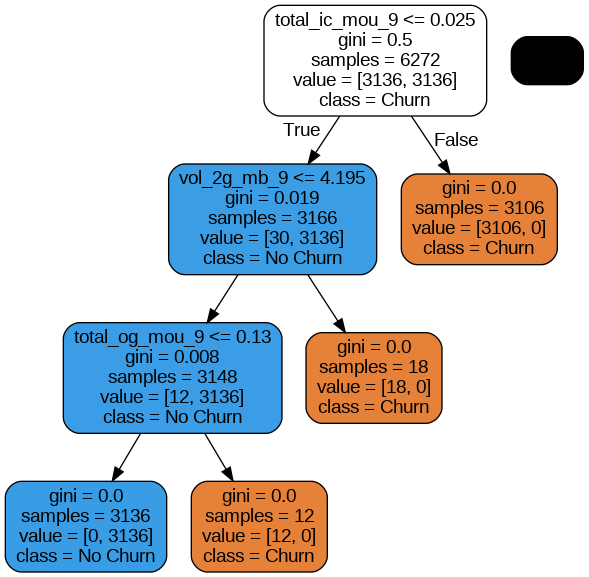

In [ ]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=x_train.columns,
                class_names=['Churn', "No Churn"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
rf = RandomForestClassifier(random_state = 42, max_depth = 3, n_estimators = 10, oob_score = True)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [ ]:
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1914837113)]

In [ ]:
rf.oob_score_

0.9791135204081632

## 6.2. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
classifier_rf = RandomForestClassifier(random_state = 42, n_jobs = -1)

In [ ]:
# Creating the parameter values

params = {
    'max_depth': [5, 10],
    'min_samples_leaf': [10, 20, 50, 100],
    'max_features': [3, 4, 5, 10],
    'n_estimators': [10, 30, 50]
}

In [ ]:
# Instantiate the Grid Search Model

grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params,
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
x = data1.drop("churn", axis = 1)

In [ ]:
y = data1["churn"]

In [ ]:
%%time

grid_search.fit(x, y)

Fitting 4 folds for each of 96 candidates, totalling 384 fits
CPU times: user 47.5 s, sys: 36.4 s, total: 1min 23s
Wall time: 8min 19s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': [3, 4, 5, 10],
                         'min_samples_leaf': [10, 20, 50, 100],
                         'n_estimators': [10, 30, 50]},
             scoring='accuracy', verbose=1)

In [ ]:
rf_best = grid_search.best_estimator_

rf_best

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=10,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [ ]:
x_train = df_train.drop("churn", axis = 1)
y_train = df_train["churn"]

x_test = df_test.drop("churn", axis = 1)
y_test = df_test["churn"]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(x_test)))

In [ ]:
evaluate_model(rf_best)

Train Accuracy : 0.920302736479207
Train Confusion Matrix:
[[33614   378]
 [ 2581   555]]
--------------------------------------------------
Test Accuracy : 0.9996767937944409
Test Confusion Matrix:
[[11326     2]
 [    2  1046]]


## 6.3. Evaluating the Variable Importance

In [ ]:
classifier_rf = RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=10,
                       n_estimators=30, n_jobs=-1, random_state=42, oob_score = True)

In [ ]:
classifier_rf.fit(x, y)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=10,
                       n_estimators=30, n_jobs=-1, oob_score=True,
                       random_state=42)

In [ ]:
classifier_rf.oob_score_

0.9989091790562379

In [ ]:
classifier_rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.70711281e-05, 1.69910759e-04, 1.85026730e-02, 7.18916958e-02,
       4.85837528e-04, 1.05525764e-04, 8.06519177e-04, 8.68620293e-03,
       1.68362456e-04, 1.28499298e-04, 2.46601382e-03, 1.21802108e-02,
       3.77882579e-05, 1.20723392e-03, 1.29366105e-02, 2.73192847e-02,
       1.88613482e-04, 2.40908301e-03, 1.55821350e-02, 3.90195820e-02,
       9.61080293e-05, 7.68472225e-04, 3.84578662e-05, 2.26423053e-02,
       1.70072557e-04, 8.92526508e-05, 3.60955326e-03, 1.55117806e-02,
       1.24178271e-05, 8.48852526e-04, 3.87087835e-07, 7.25374477e-03,
       1.96166820e-05, 2.18516677e-05, 2.61857463e-05, 1.51470478e-02,
       7.67239936e-05, 1.63886051e-04, 1.08654120e-03, 1.73799510e-02,
       1.39984568e-04, 3.98016528e-04, 8.87232401e-05, 1.47985599e-02,
       4.59194331e-04, 1.22557320e-04, 1.91160586e-03, 2.30220158e-02,
       5.12811627e-05, 1.85889250e-06, 1.39744293e-05, 2.55549283e-03,
      

In [ ]:
feature_importance_df = pd.DataFrame({"Var_Name": x.columns, "Importance": classifier_rf.feature_importances_})

In [ ]:
feature_importance_df.sort_values(by = "Importance", ascending = False).head(20)

,Var_Name,Importance
119,total_ic_mou_9,0.137618
79,total_og_mou_9,0.074173
7,arpu_9,0.071892
139,total_rech_amt_9,0.042116
23,roam_og_mou_9,0.039020
75,og_others_9,0.038448
99,std_ic_t2t_mou_9,0.032195
87,loc_ic_t2m_mou_9,0.031316
19,roam_ic_mou_9,0.027319
67,isd_og_mou_9,0.025039


## 6.4. Important Features

- The following features are the most important features among all the features for customer churns:
  1. **total_ic_mou_9:** Total incoming call minutes of usage in September (9th month).
  2. **total_og_mou_9:** Total outgoing call minutes of usage in September (9th month).
  3. **arpu_9:** Average revenue per user in September (9th month).
  4. **total_rech_amt_9:** Total recharge amount in September (9th month).
  5. **roam_og_mou_9:** Roaming outgoing call minutes of usage in September (9th month).
  6. **og_others_9:** Outgoing call minutes to other operators in September (9th month).
  7. **std_ic_t2t_mou_9:** Standard incoming call minutes of usage within the same operator network in September (9th month).
  8. **loc_ic_t2m_mou_9:** Local incoming call minutes of usage from other operators in September (9th month).
  9. **roam_ic_mou_9:** Roaming incoming call minutes of usage in September (9th month).
  10. **isd_og_mou_9:** ISD outgoing call minutes of usage in September (9th month).
  11. **max_rech_amt_9:** Maximum recharge amount in September (9th month).
  12. **std_og_t2m_mou_9:** Standard outgoing call minutes of usage within the same operator network in September (9th month).
  13. **loc_og_t2t_mou_9:** Local outgoing call minutes of usage within the same operator network in September (9th month).
  14. **loc_ic_mou_9:** Local incoming call minutes of usage in September (9th month).
  15. **isd_ic_mou_9:** ISD incoming call minutes of usage in September (9th month).
  16. **arpu_8:** Average revenue per user in August (8th month).
  17. **total_og_mou_8:** Total outgoing call minutes of usage in August (8th month).
  18. **loc_og_mou_9:** Local outgoing call minutes of usage in September (9th month).
  19. **loc_ic_t2t_mou_9:** Local incoming call minutes of usage within the same operator network in September (9th month).
  20. **roam_og_mou_8:** Roaming outgoing call minutes of usage in August (8th month).